In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load cleaned data
rainfall_df = pd.read_csv('../data/processed/rainfall_clean.csv')

print(f"Loaded {len(rainfall_df):,} rainfall records")
print(f"Period: 1990-2022")

Loaded 4,920 rainfall records
Period: 1990-2022


In [2]:
# Filter to Annual rainfall only
rainfall_annual = rainfall_df[rainfall_df['season'] == 'Annual'].copy()

print(f"Annual rainfall records: {len(rainfall_annual):,}")
print(f"Sites: {rainfall_annual['site'].nunique()}")
print(f"\nSample sites:")
print(rainfall_annual['site'].unique()[:10])

Annual rainfall records: 990
Sites: 30

Sample sites:
['Auckland (Auckland)' 'Blenheim (Marlborough)'
 'Christchurch (Canterbury)' 'Dannevirke (Manawatū-Whanganui)'
 'Dunedin (Otago)' 'Gisborne (Gisborne)' 'Gore (Southland)'
 'Hamilton (Waikato)' 'Hokitika (West Coast)' 'Invercargill (Southland)']


In [4]:
# Calculate rainfall change (1990s vs 2020s)
rainfall_change = []

for site in rainfall_annual['site'].unique():
    site_data = rainfall_annual[rainfall_annual['site'] == site].copy()
    
    # Extract year from period_start
    site_data['year'] = pd.to_datetime(site_data['period_start']).dt.year
    site_data = site_data.sort_values('year')
    
    if len(site_data) >= 30:
        rain_1990s = site_data[site_data['year'] <= 1995]['precipitation'].mean()
        rain_2020s = site_data[site_data['year'] >= 2017]['precipitation'].mean()
        
        change_mm = rain_2020s - rain_1990s
        change_pct = (change_mm / rain_1990s) * 100
        
        rainfall_change.append({
            'site': site,
            'rainfall_1990s': rain_1990s,
            'rainfall_2020s': rain_2020s,
            'change_mm': change_mm,
            'change_percent': change_pct
        })

rain_change_df = pd.DataFrame(rainfall_change).sort_values('change_percent', ascending=False)

print("TOP 5 SITES - RAINFALL INCREASE:")
print(rain_change_df[['site', 'rainfall_1990s', 'change_mm', 'change_percent']].head())

print("\n TOP 5 SITES - RAINFALL DECREASE:")
print(rain_change_df[['site', 'rainfall_1990s', 'change_mm', 'change_percent']].tail())

TOP 5 SITES - RAINFALL INCREASE:
                         site  rainfall_1990s   change_mm  change_percent
29      Whangārei (Northland)     1136.633333  331.300000       29.147482
10       Kerikeri (Northland)     1463.950000  272.400000       18.607193
12     Masterton (Wellington)      820.350000  152.516667       18.591658
5         Gisborne (Gisborne)      918.733333  158.083333       17.206661
2   Christchurch (Canterbury)      629.166667  103.366667       16.429139

 TOP 5 SITES - RAINFALL DECREASE:
                               site  rainfall_1990s   change_mm  \
21  Taumarunui (Manawatū-Whanganui)     1517.683333  -99.733333   
9          Invercargill (Southland)     1132.083333  -80.550000   
17               Queenstown (Otago)      806.283333  -84.366667   
18             Reefton (West Coast)     2165.950000 -239.750000   
3   Dannevirke (Manawatū-Whanganui)     1097.500000 -131.733333   

    change_percent  
21       -6.571419  
9        -7.115201  
17      -10.463650  
1

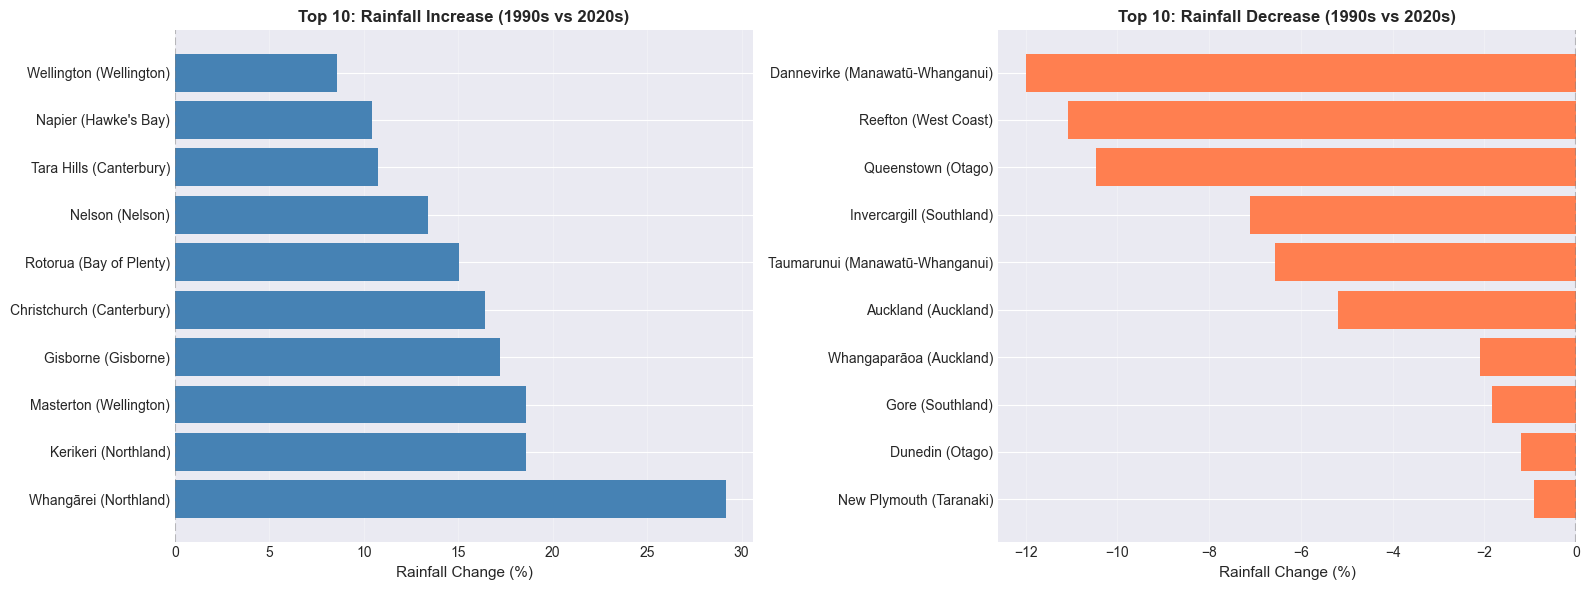

Chart saved


In [6]:
# Plot top 10 increases and decreases
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Top 10 increases
top_10_increase = rain_change_df.head(10)
ax1.barh(range(len(top_10_increase)), top_10_increase['change_percent'], color='steelblue')
ax1.set_yticks(range(len(top_10_increase)))
ax1.set_yticklabels(top_10_increase['site'])
ax1.set_xlabel('Rainfall Change (%)', fontsize=11)
ax1.set_title('Top 10: Rainfall Increase (1990s vs 2020s)', fontsize=12, fontweight='bold')
ax1.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
ax1.grid(axis='x', alpha=0.3)

# Top 10 decreases
bottom_10_decrease = rain_change_df.tail(10)
ax2.barh(range(len(bottom_10_decrease)), bottom_10_decrease['change_percent'], color='coral')
ax2.set_yticks(range(len(bottom_10_decrease)))
ax2.set_yticklabels(bottom_10_decrease['site'])
ax2.set_xlabel('Rainfall Change (%)', fontsize=11)
ax2.set_title('Top 10: Rainfall Decrease (1990s vs 2020s)', fontsize=12, fontweight='bold')
ax2.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/figures/rainfall_change_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved")

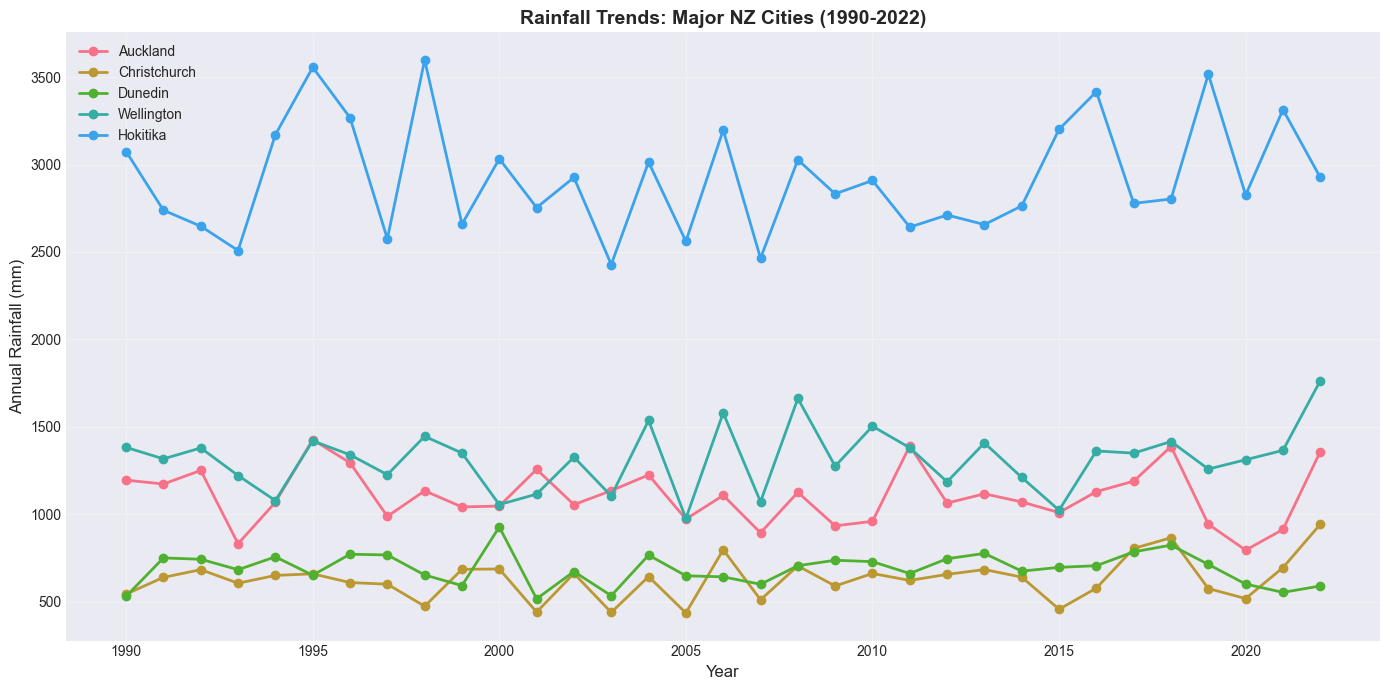

Time series chart saved


In [7]:
# Time series for key cities
key_sites = [
    'Auckland (Auckland)',
    'Christchurch (Canterbury)', 
    'Dunedin (Otago)',
    'Wellington (Wellington)',
    'Hokitika (West Coast)'  # Wettest region
]

# Prepare data
key_data = rainfall_annual[rainfall_annual['site'].isin(key_sites)].copy()
key_data['year'] = pd.to_datetime(key_data['period_start']).dt.year

# Plot
plt.figure(figsize=(14, 7))

for site in key_sites:
    site_data = key_data[key_data['site'] == site].sort_values('year')
    plt.plot(site_data['year'], site_data['precipitation'], 
             marker='o', linewidth=2, label=site.split(' (')[0])

plt.xlabel('Year', fontsize=12)
plt.ylabel('Annual Rainfall (mm)', fontsize=12)
plt.title('Rainfall Trends: Major NZ Cities (1990-2022)', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.savefig('../outputs/figures/rainfall_trends_major_cities.png', dpi=300, bbox_inches='tight')
plt.show()

print("Time series chart saved")

In [10]:
# Create summary comparison table
print("="*60)
print("RAINFALL ANALYSIS SUMMARY (1990-2022)")
print("="*60)

summary = rain_change_df[['site', 'rainfall_1990s', 'rainfall_2020s', 
                           'change_mm', 'change_percent']].copy()
summary.columns = ['Site', '1990s (mm)', '2020s (mm)', 'Change (mm)', 'Change (%)']

# Round for readability
summary['1990s (mm)'] = summary['1990s (mm)'].round(1)
summary['2020s (mm)'] = summary['2020s (mm)'].round(1)
summary['Change (mm)'] = summary['Change (mm)'].round(1)
summary['Change (%)'] = summary['Change (%)'].round(1)

print("\n Full Comparison Table:")
print(summary.to_string(index=False))


RAINFALL ANALYSIS SUMMARY (1990-2022)

 Full Comparison Table:
                           Site  1990s (mm)  2020s (mm)  Change (mm)  Change (%)
          Whangārei (Northland)      1136.6      1467.9        331.3        29.1
           Kerikeri (Northland)      1464.0      1736.3        272.4        18.6
         Masterton (Wellington)       820.4       972.9        152.5        18.6
            Gisborne (Gisborne)       918.7      1076.8        158.1        17.2
      Christchurch (Canterbury)       629.2       732.5        103.4        16.4
        Rotorua (Bay of Plenty)      1336.7      1537.3        200.7        15.0
                Nelson (Nelson)       959.8      1088.2        128.4        13.4
        Tara Hills (Canterbury)       544.4       603.1         58.7        10.8
           Napier (Hawke's Bay)       706.3       780.2         73.8        10.5
        Wellington (Wellington)      1298.9      1410.1        111.2         8.6
       Tauranga (Bay of Plenty)      1169.3   